In [1]:
!pip install rdkit
!pip install umap-learn
!pip install hdbscan
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 27.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipy_display
from IPython.display import Image, display

import rdkit
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import rdFingerprintGenerator

In [3]:
file_path = "/content/drive/MyDrive/BioSolveAI/data/curated-solubility-dataset.csv"
df = pd.read_csv(file_path)

# loading the dataset and inspecting it
print(f"Dataset has shape {df.shape} \nFirst 5 entries: ")
df.head()

Dataset has shape (9982, 26) 
First 5 entries: 


,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [4]:
# missing value and duplicate check
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
  print(f"There are no missing values.")

duplicate_values = df.duplicated().sum()
if duplicate_values == 0:
  print(f"There are no duplicates.")

There are no missing values.
There are no duplicates.


,0
ID,A-3
Name,"N,N,N-trimethyloctadecan-1-aminium bromide"
InChI,InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...
InChIKey,SZEMGTQCPRNXEG-UHFFFAOYSA-M
SMILES,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C
Solubility,-3.616127
SD,0.0
Ocurrences,1
Group,G1
MolWt,392.51


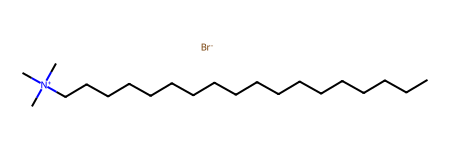

In [5]:
# inspecting the 1st molecule in our dataset
row = df.iloc[0]
ipy_display.display(row)
smile = str(row['SMILES'])
mol = Chem.MolFromSmiles(smile)
display(mol)

In [9]:
# new column in our data set holding all the mol objects
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df[['mol']].head()

[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not removing hydrogen atom without neighbors
[20:40:42] WARNING: not r

,mol
0,<rdkit.Chem.rdchem.Mol object at 0x79c3eff7d0e0>
1,<rdkit.Chem.rdchem.Mol object at 0x79c3efce0e40>
2,<rdkit.Chem.rdchem.Mol object at 0x79c3efce0f20>
3,<rdkit.Chem.rdchem.Mol object at 0x79c3efce1070>
4,<rdkit.Chem.rdchem.Mol object at 0x79c3efce1000>


(9982, 1)


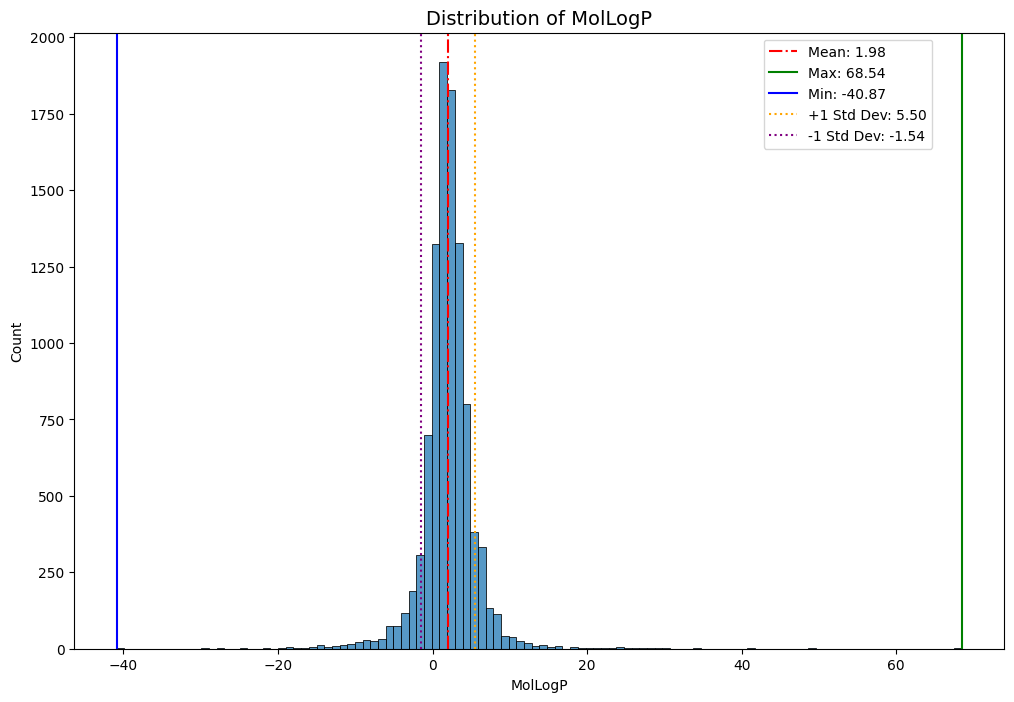

Text(0.5, 1.0, 'Box Plot of MolLogP')

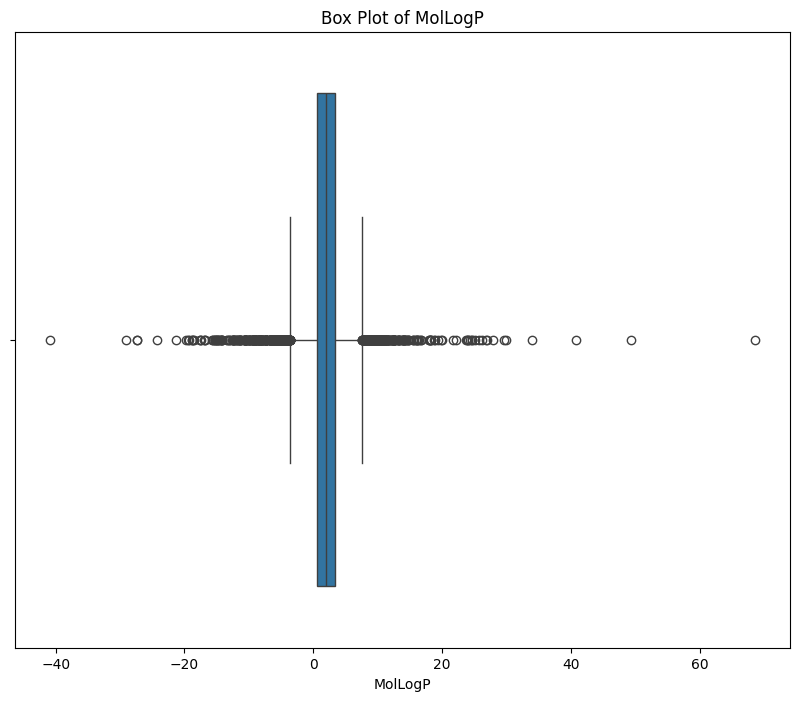

In [6]:
# Displaying distribution of MolLogP values

y = df['MolLogP'].values.reshape(-1,1)
stats = df['MolLogP'].agg(["max", "min", "std", "mean"])

print(y.shape)

plt.figure(figsize=(12, 8))
g = sns.histplot(df['MolLogP'],bins=110)
plt.xlabel('MolLogP')
plt.title('Distribution of MolLogP', fontsize=14)

# Vertical line for basic statistics statistics
plt.axvline(stats['mean'], color='red', linestyle='-.', label=f"Mean: {stats['mean']:.2f}")
plt.axvline(stats['max'], color='green', linestyle='-', label=f"Max: {stats['max']:.2f}")
plt.axvline(stats['min'], color='blue', linestyle='-', label=f"Min: {stats['min']:.2f}")
plt.axvline(stats['mean'] + stats['std'], color='orange', linestyle=':', label=f"+1 Std Dev: {stats['mean'] + stats['std']:.2f}")
plt.axvline(stats['mean'] - stats['std'], color='purple', linestyle=':', label=f"-1 Std Dev: {stats['mean'] - stats['std']:.2f}")

plt.legend(loc="upper right", bbox_to_anchor=(0.93, 1))


plt.show()

# Box plot for MolLogP
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['MolLogP'])
plt.title("Box Plot of MolLogP")

Clearly, there are some key outliers in the data when it comes to MolLogP (the very small bins on the outer parts of the graphs), we will handle those when it comes to data preprocessing! One possible approach is to remove all entries with LogP above 30 and those below -20.

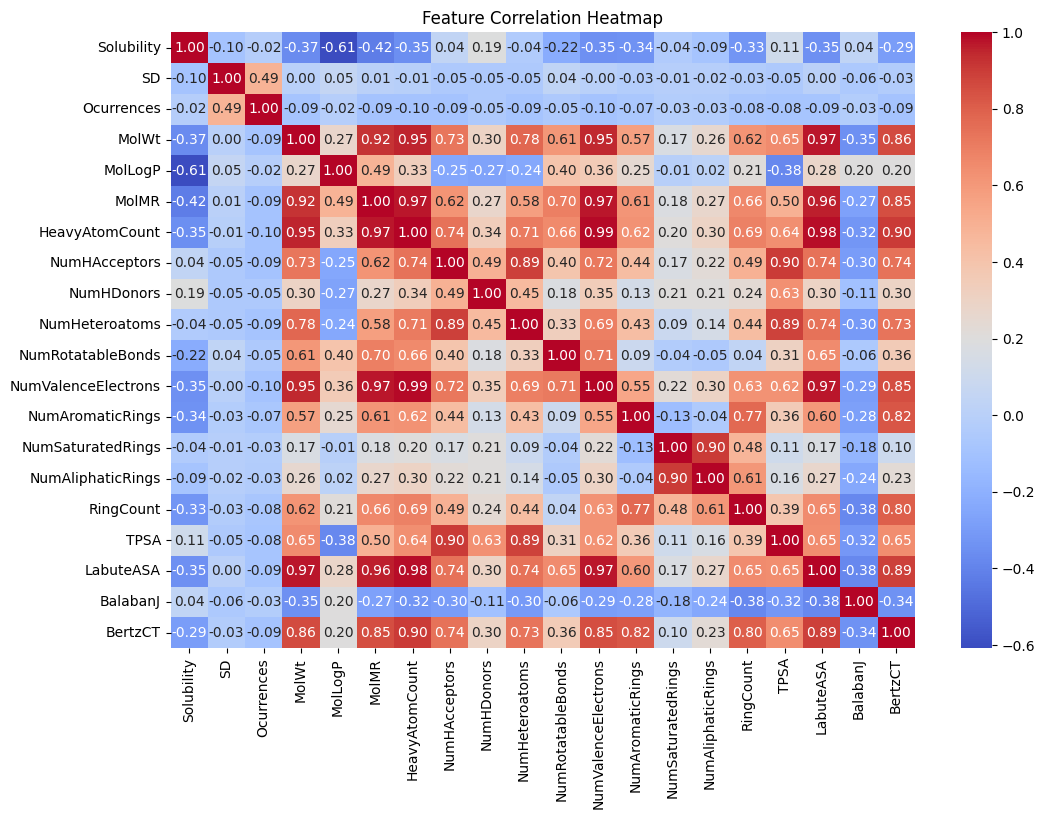

In [11]:
# Correlation heat map to identify redundant columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Based on a glance, it looks like LabuteASA, NumValenceElectrons and HeavyAtomCount are quite redundant attributes (high correlation with other attributes). Might need to consider this when making a choice on feature selection for our baseline (and final NN).